# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [1]:
from t2_utility import *

In [2]:
with open(f'{PICKLE_FOLDER}{CLUST_DF}.pkl', 'rb') as f:
    clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{CLUST_DF}.pkl', 'rb') as f:
    pure_clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{SELECTED}{USER_DF}.pkl', 'rb') as f:
    u_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{SELECTED}{USER_DF}.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)

In [3]:
clustering_df_array, clustering_df = scale_df(clustering_df, 1)
pure_clustering_df_array, pure_clustering_df = scale_df(pure_clustering_df, 1)

In [4]:
# Sum of Squared Errors: cohesion measure
# silhouette score: both cohesion and separation measure
clustering_scores_df = pd.DataFrame(columns = ['silhouette', 'SSE'], dtype=float)

## Hierarchical

#### Link methods
- complete: equivalent to Farthest Point Algorithm
- single: equivalent to Nearest Point Algorithm
- average: metric is average of distances of all pairs of points in the two clusters
- centroid: metric is distance between centroids

In [5]:
methods = ['complete', 'single', 'average', 'centroid']
best_n_clusters = 14

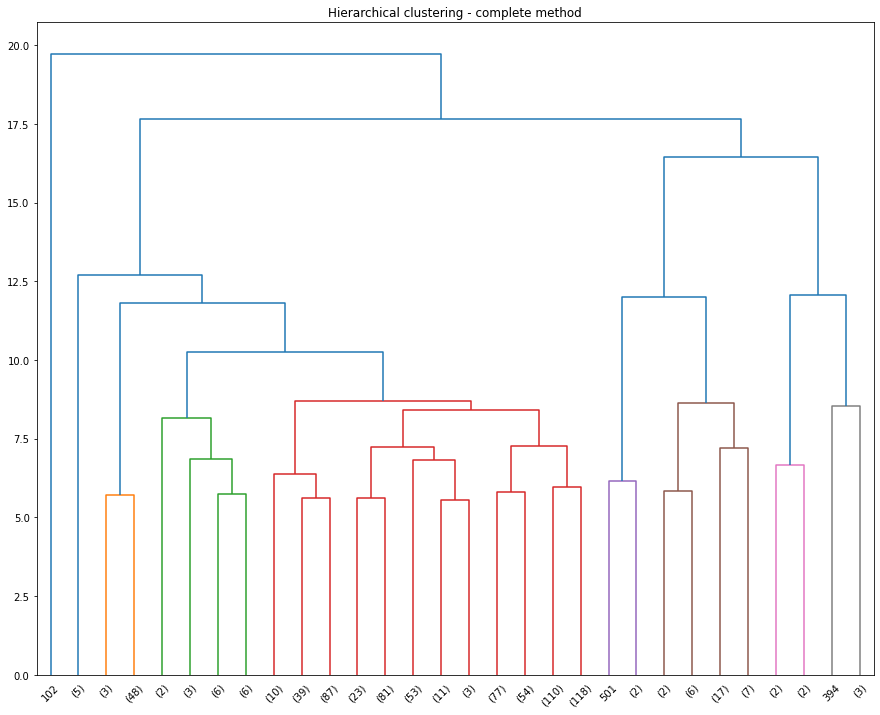

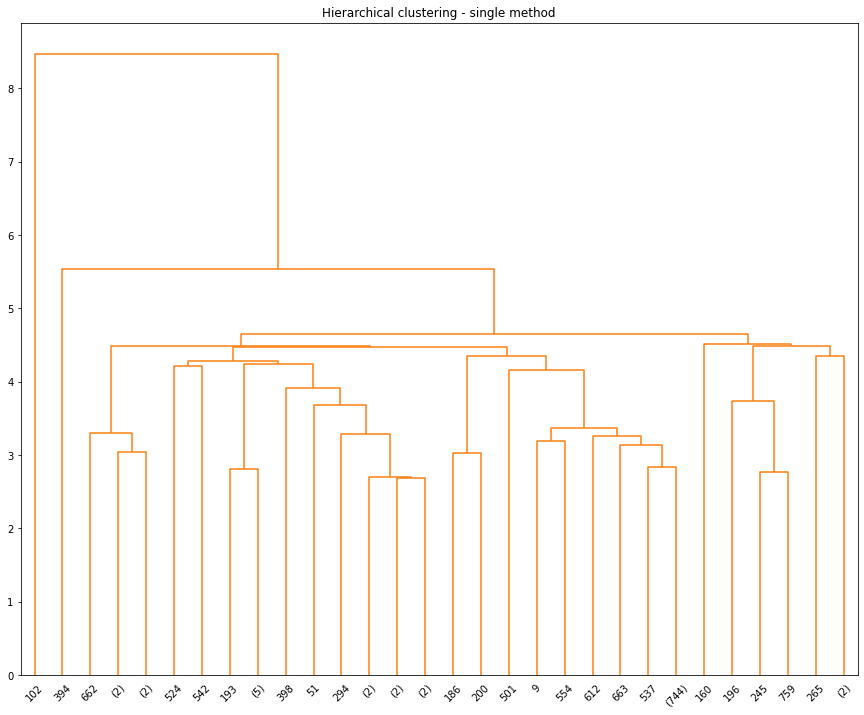

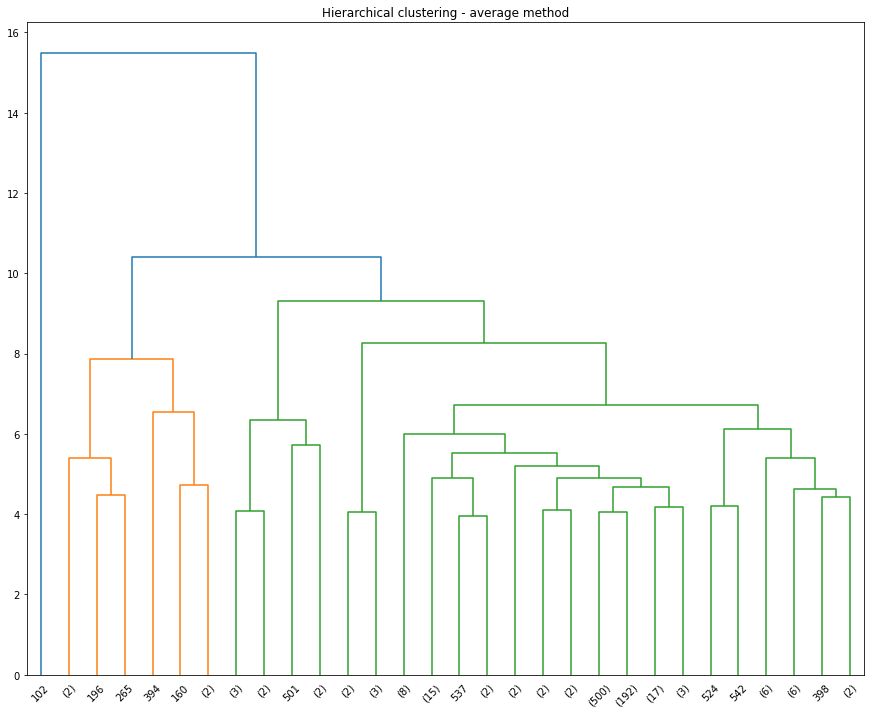

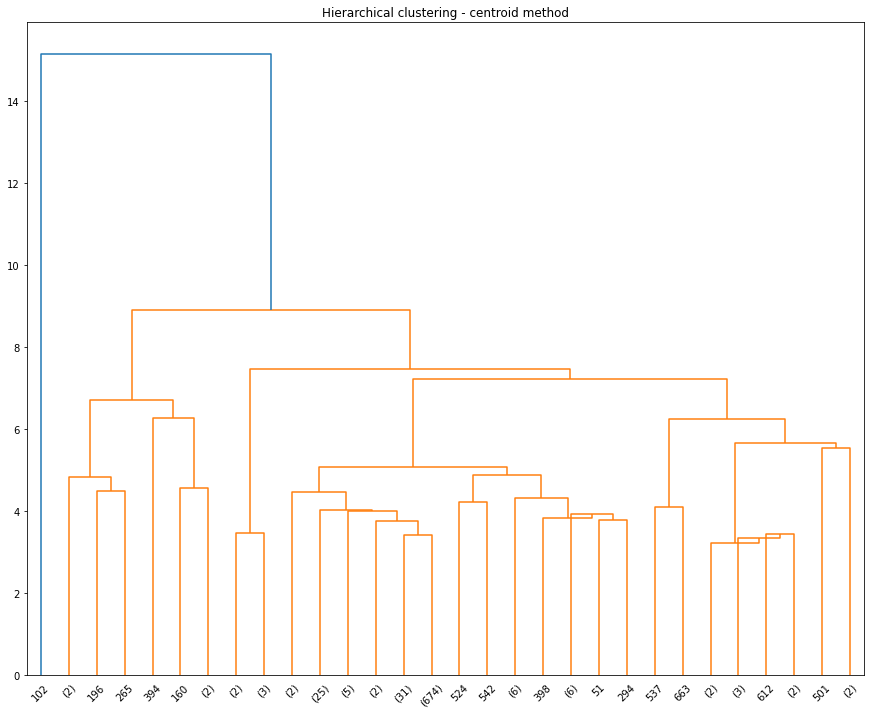

In [6]:
data_link_list = []
for method in methods:
    data_link_list.append(hierarchical_clustering(clustering_df_array, method, best_n_clusters, clustering_scores_df))

In [7]:
# pure_data_link_list = []
# for method in methods:
#     pure_data_link_list.append(hierarchical_clustering(pure_clustering_df_array, method, best_n_clusters, clustering_scores_df, pure=1))

In [8]:
clustering_scores_df

,silhouette,SSE
hierarchical_complete,0.090439,4219.323165
hierarchical_single,0.386912,6363.906105
hierarchical_average,0.206046,5638.700594
hierarchical_centroid,-2.000000,8613.000000


We plot only the cluster analysis of the complete method, because the others do not achieve great scores

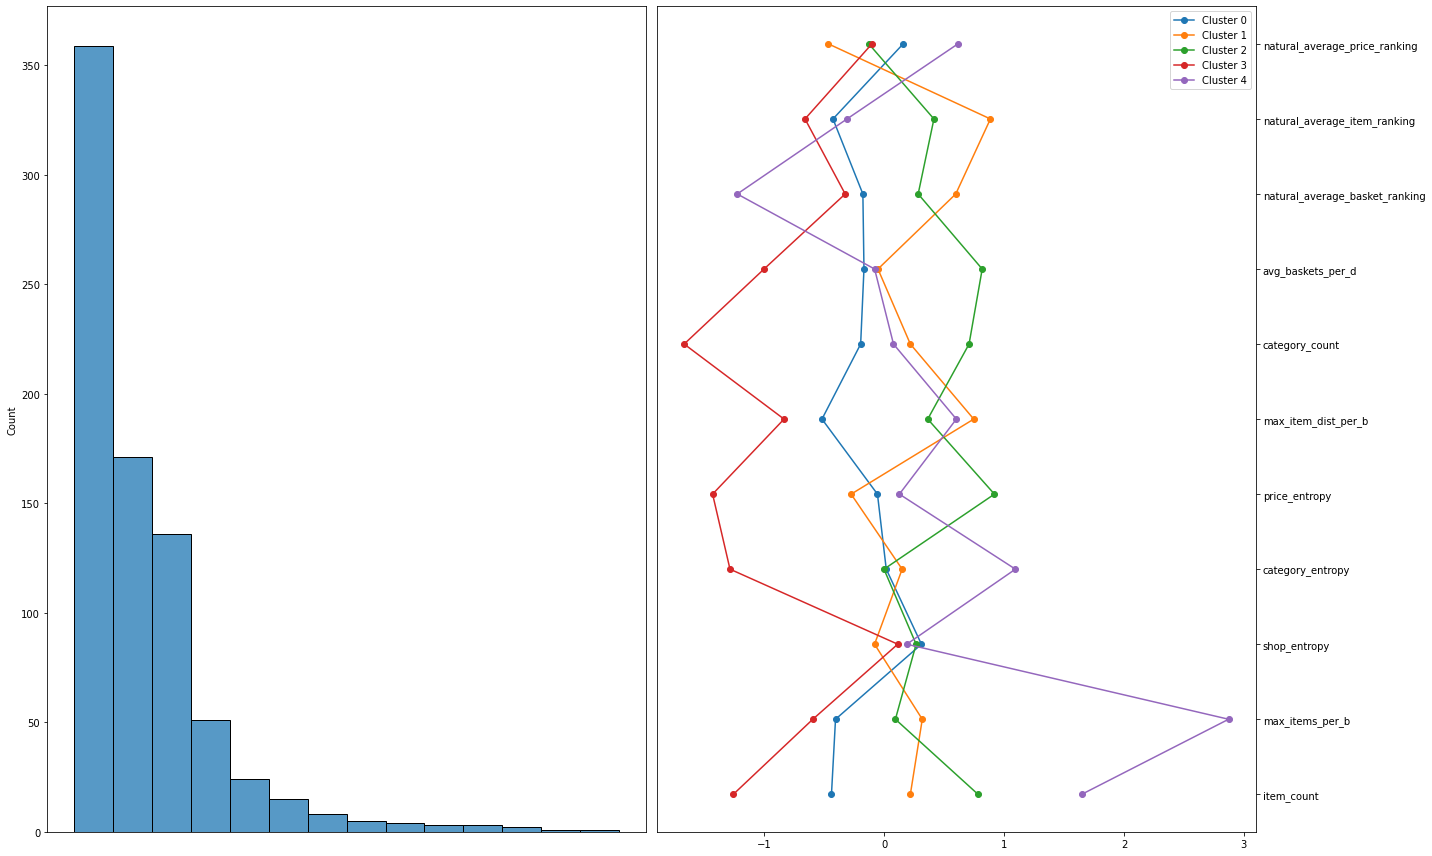

In [9]:
l = show_clusters(data_link_list[0], clustering_df_array, clustering_df, best_n_clusters, figsize=(20,12))
u_df[LAB] = l.to_numpy()
clustering_df[LAB] = l.to_numpy()

In [10]:
# pl = show_clusters(pure_data_link_list[0], pure_clustering_df_array, pure_clustering_df, best_n_clusters)
# pure_u_df[LAB] = pl.to_numpy()
# pure_clustering_df[LAB] = pl.to_numpy()

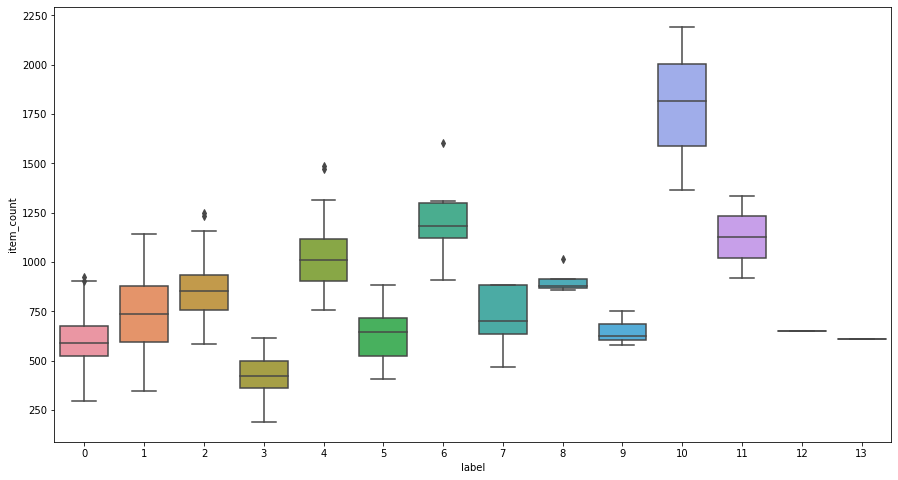

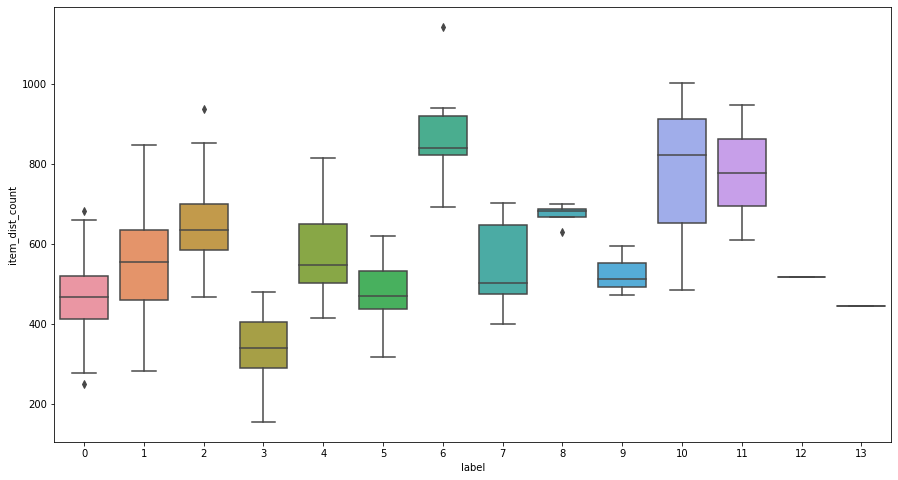

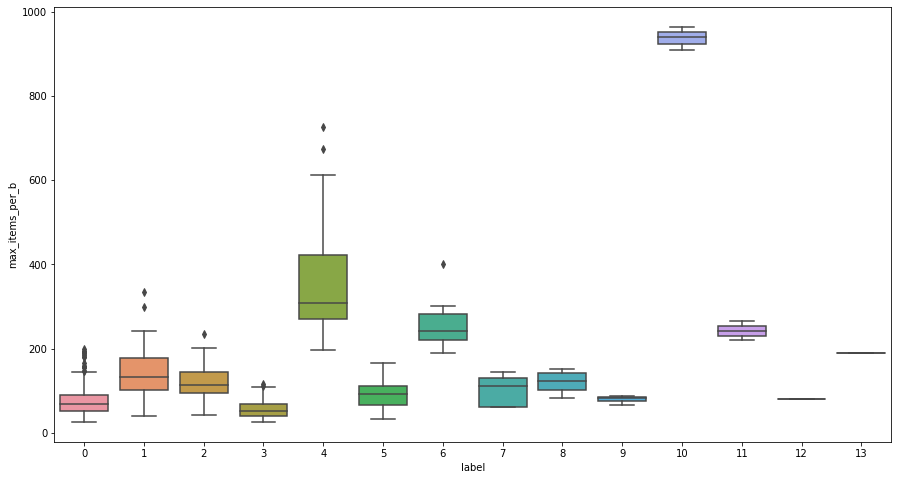

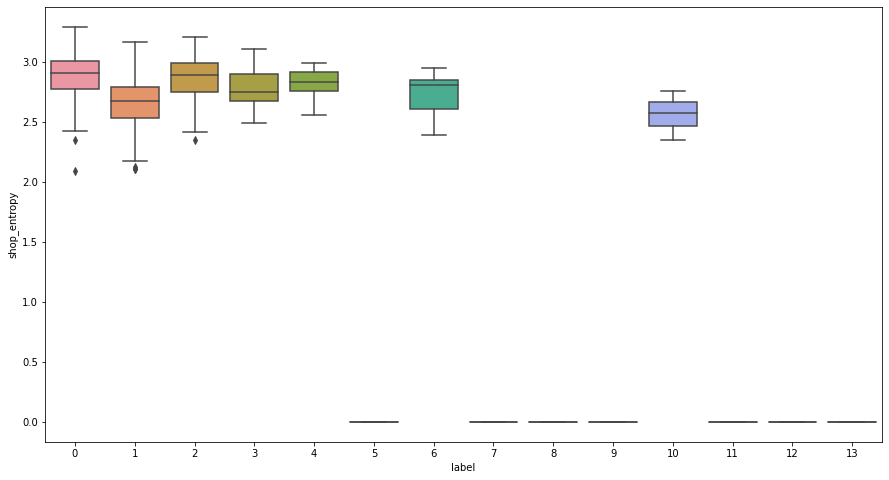

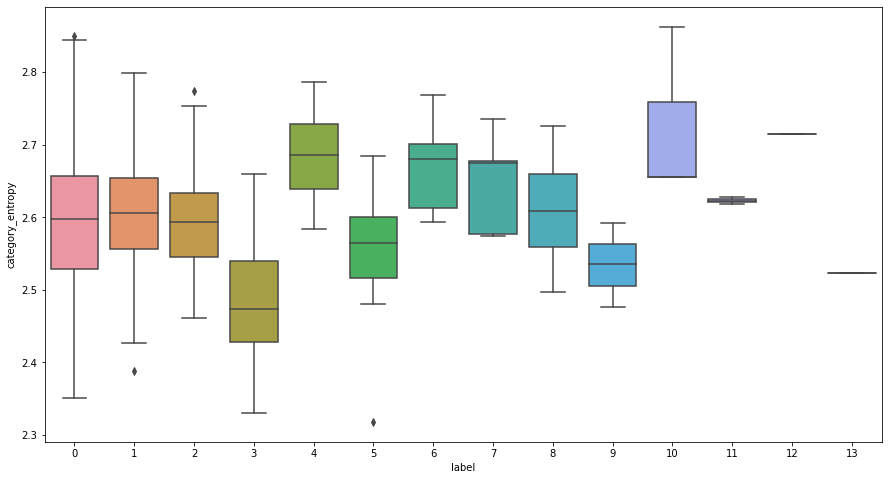

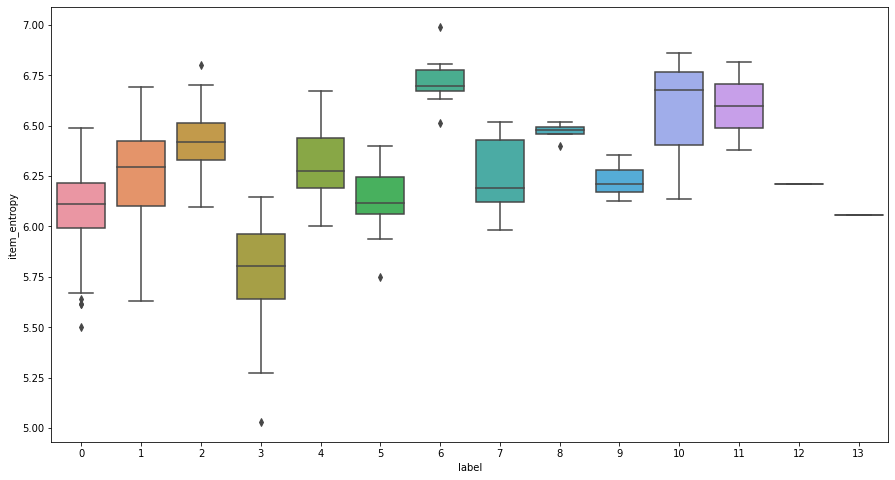

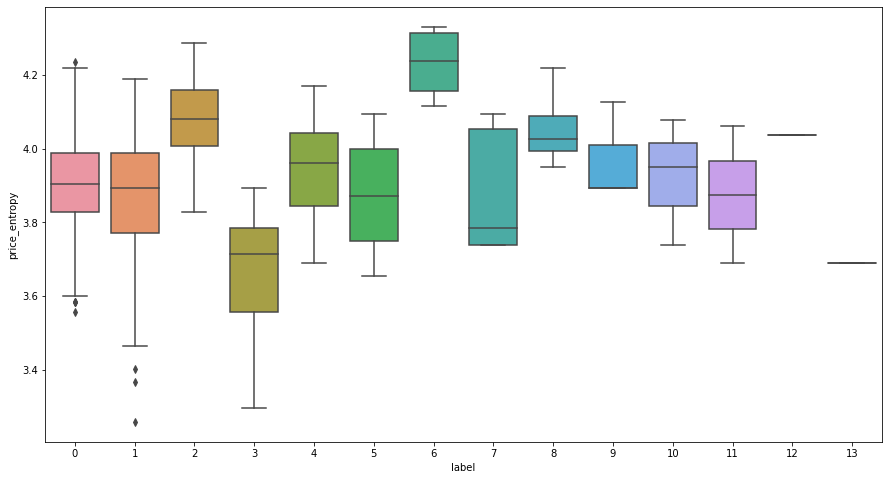

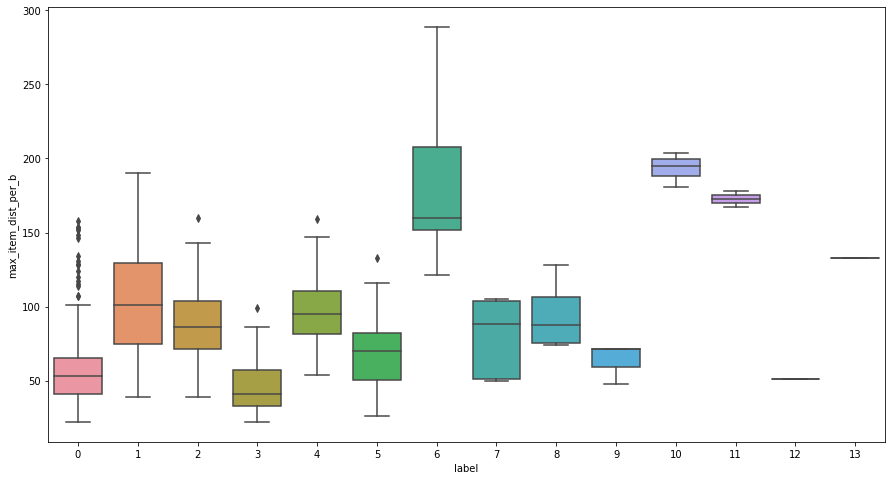

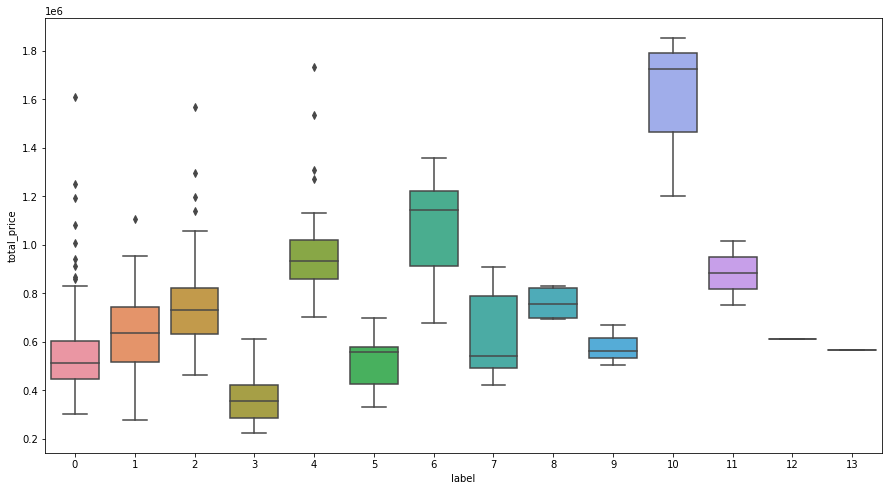

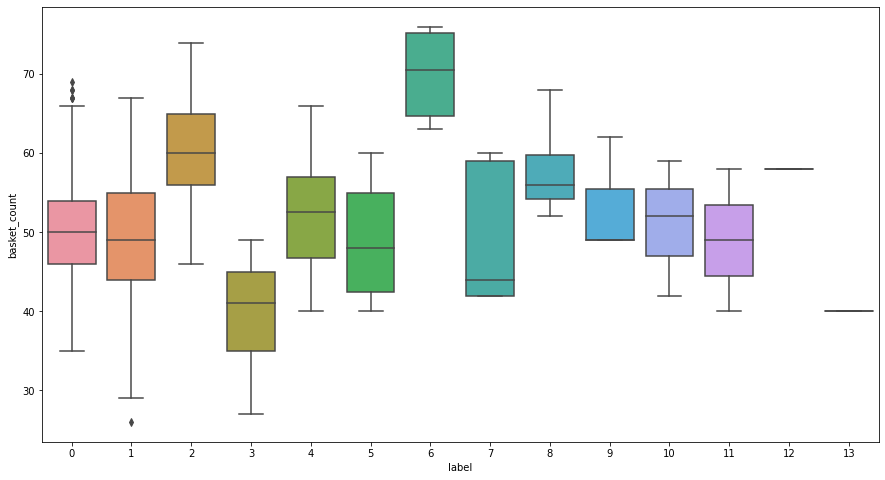

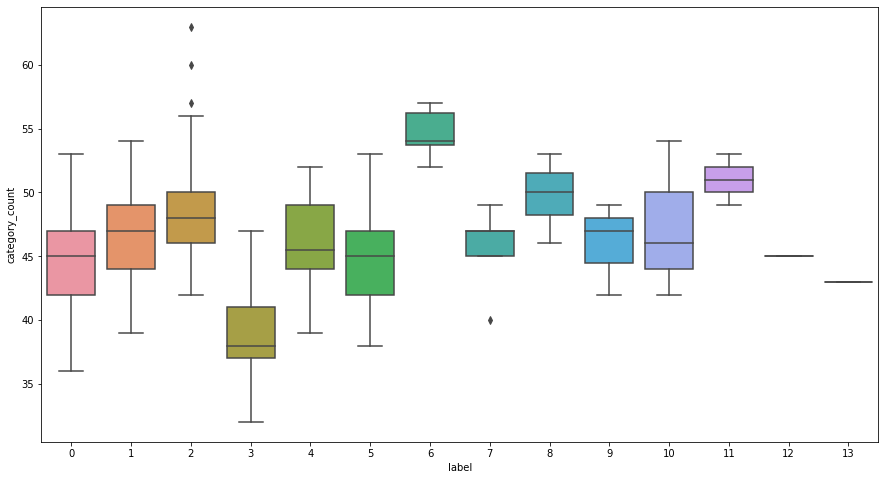

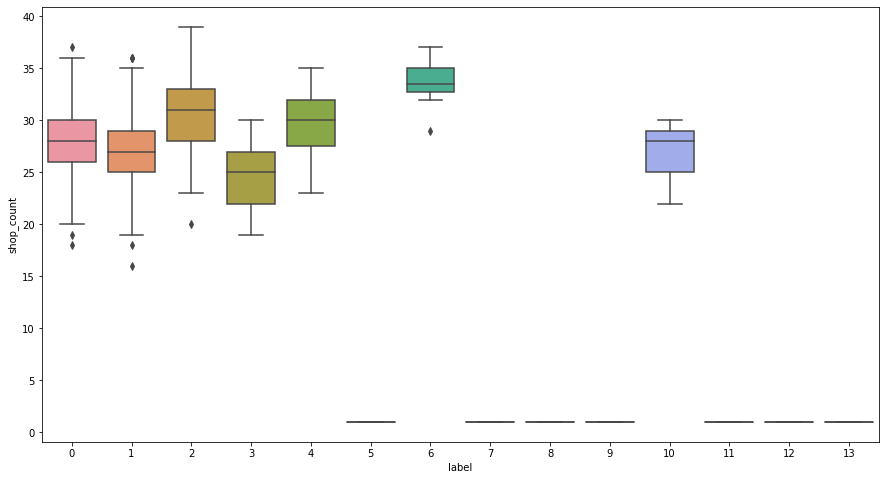

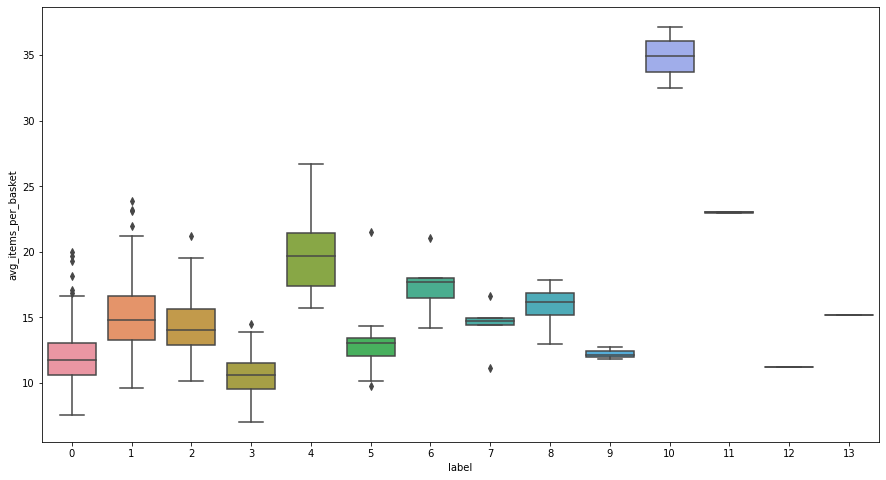

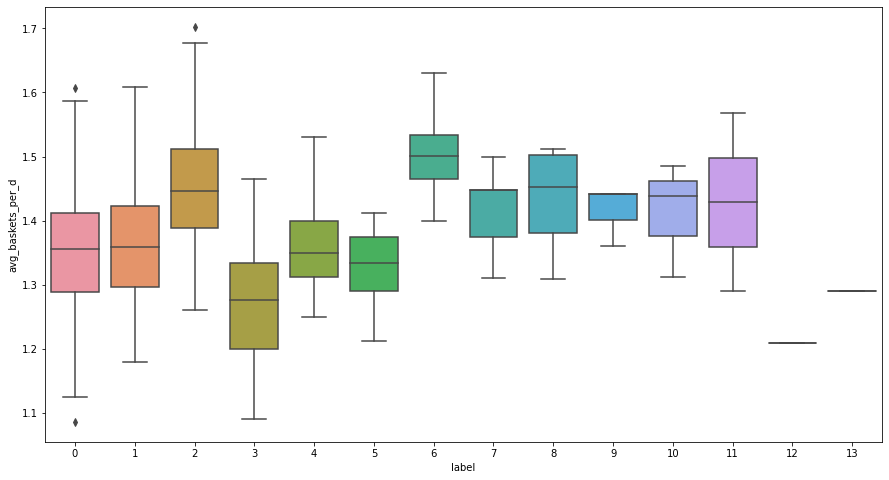

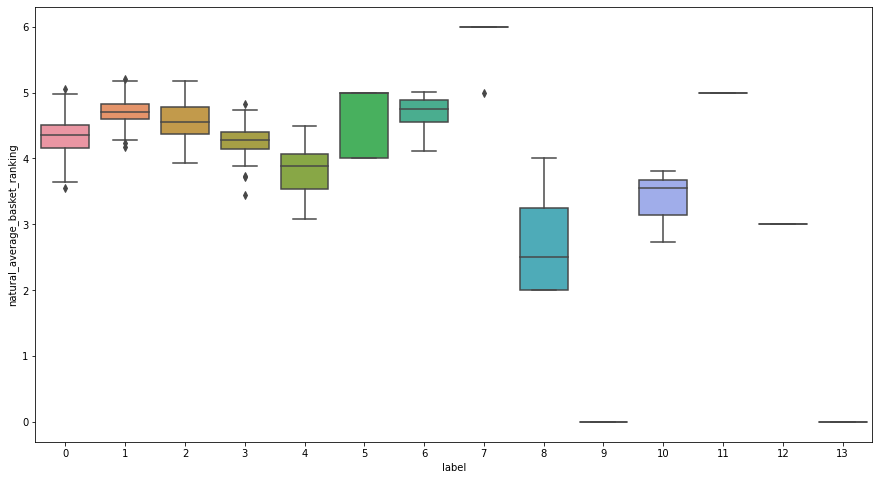

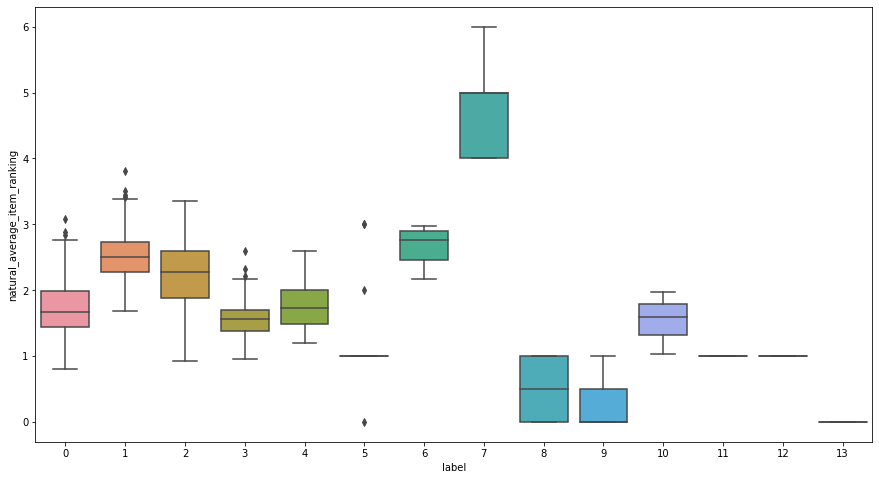

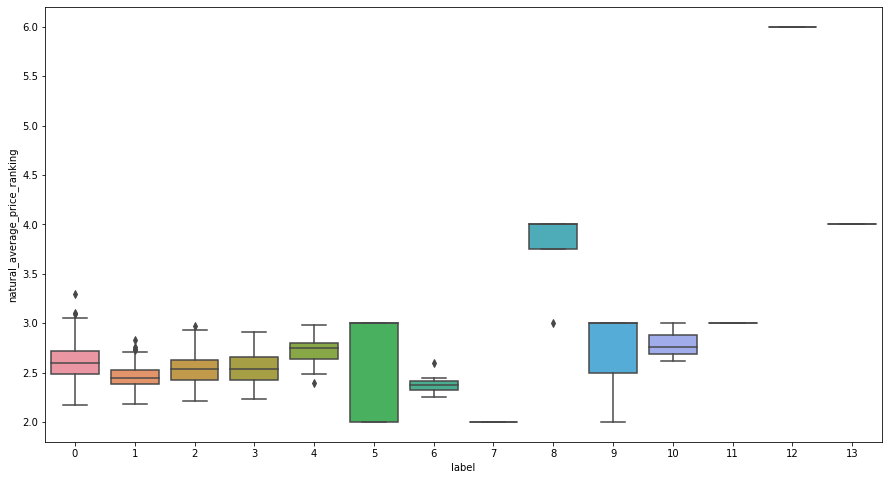

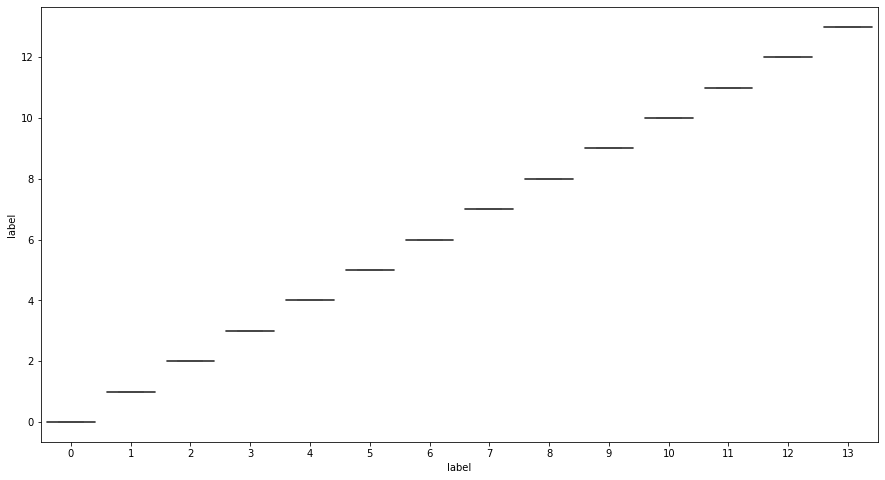

In [11]:
for c in u_df.columns:
    _, ax = plt.subplots(figsize=(15,8))
    sns.boxplot(x=LAB, y=c, data=u_df)

In [12]:
# for c in pure_u_df.columns:
#     _, ax = plt.subplots(figsize=(15,8))
#     sns.boxplot(x=LAB, y=c, data=pure_u_df)